# **DataCamp.Course_054_Hypothesis Testing in Python**

### **Course Description**

Hypothesis testing lets you answer questions about your datasets in a statistically rigorous way. In this course, you'll grow your Python analytical skills as you learn how and when to use common tests like t-tests, proportion tests, and chi-square tests. Working with real-world data, including Stack Overflow user feedback and supply-chain data for medical supply shipments, you'll gain a deep understanding of how these tests work and the key assumptions that underpin them. You'll also discover how non-parametric tests can be used to go beyond the limitations of traditional hypothesis tests.

In [2]:
# read_feather function

import os
import pandas as pd
folder_name = 'datasets'
dir = r'C:\Users\mcaba\OneDrive\Escritorio\Data Science\Datacamp_Notebook\Datacamp_Notebook\{}'.format(folder_name)

def read_feather_fun(folder_name,file_name, path):
    path = dir
    os.chdir(path)
    df = pd.read_feather('{}.feather'.format(file_name))
    return df

stack_overflow = read_feather_fun('datasets','stack_overflow', dir)
display(stack_overflow.head(2))

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30


In [3]:
dem_votes_potus_12_16 = read_feather_fun('datasets','dem_votes_potus_12_16', dir)
display(dem_votes_potus_12_16.head(2))

,state,county,dem_percent_12,dem_percent_16
0,Alabama,Bullock,76.305900,74.946921
1,Alabama,Chilton,19.453671,15.847352


In [4]:
late_shipments = read_feather_fun('datasets','late_shipments', dir)
display(late_shipments.head(2))

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.0,89.0,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.0,32.0,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72


In [5]:
repub_votes_potus_08_12 = read_feather_fun('datasets','repub_votes_potus_08_12', dir)
display(repub_votes_potus_08_12.head(2))

,state,county,repub_percent_08,repub_percent_12
0,Alabama,Hale,38.957877,37.139882
1,Arkansas,Nevada,56.726272,58.983452


## **Hypothesis Testing Fundamentals (Module 01-054)**

#### **Hypothesis tests and z-scores**

1. A/B testing
In 2013, Electronic Arts (EA) released SimCity 5
    They wanted to increase pre-orders of the
    game
    They used A/B testing to test different
    advertising scenarios
    This involves splitting users into control and
    treatment groups

A/B test results
The treatment group (no ad) got 43.4% more purchases than the control group (with ad)
    Intuition that "showing an ad would increase sales" was false
    Was this result statistically significant or just chance?
    Need EA's data to determine this
    Techniques from Sampling in Python + this course to do so

2. Stack Overflow Developer Survey 2020

import pandas as pd
print(stack_overflow)

3. Hypothesizing about the mean

A hypothesis:
The mean annual compensation of the population of data scientists is $110,000
The point estimate (sample statistic):
mean_comp_samp = stack_overflow['converted_comp'].mean()

4. Generating a bootstrap distribution

import numpy as np
# Step 3. Repeat steps 1 & 2 many times, appending to a list
so_boot_distn = []
for i in range(5000):
    so_boot_distn.append(
    # Step 2. Calculate point estimate
        np.mean(
            # Step 1. Resample
            stack_overflow.sample(frac=1, replace=True)['converted_comp']
        )
)

5. Visualizing the bootstrap distribution

import matplotlib.pyplot as plt
plt.hist(so_boot_distn, bins=50)
plt.show()

6. Standard error

std_error = np.std(so_boot_distn, ddof=1)

7. z-scores

standardized value = (value)-(mean) / (standard deviation)

z = (sample stat)-(hypoth.param.value) / (standard error)

stack_overflow['converted_comp'].mean()

mean_comp_hyp = 110000

z_score = (mean_comp_samp - mean_comp_hyp) / std_error

8. Testing the hypothesis

Is 1.707 a high or low number?
This is the goal of the course!
Hypothesis testing use case:
Determine whether sample statistics are close to or far 
away from expected (or"hypothesized" values)

9. Standard normal (z) distribution

Standard normal distribution: normal distribution with mean = 0 + standard deviation = 1

119574.71738168952


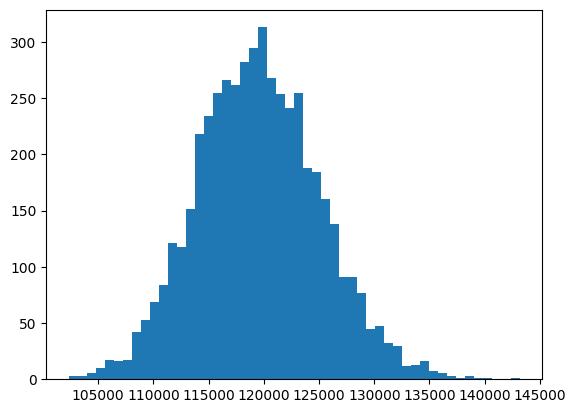

5566.086971707613


In [6]:
# A hypothesis:
# The mean annual compensation of the population of data scientists is $110,000
# The point estimate (sample statistic):

mean_comp_samp = stack_overflow['converted_comp'].mean()
print(mean_comp_samp)

import numpy as np
# Step 3. Repeat steps 1 & 2 many times, appending to a list
so_boot_distn = []
for i in range(5000):
    so_boot_distn.append(
    # Step 2. Calculate point estimate
        np.mean(
            # Step 1. Resample
            stack_overflow.sample(frac=1, replace=True)['converted_comp']
        )
)

import matplotlib.pyplot as plt
plt.hist(so_boot_distn, bins=50)
plt.show()

std_error = np.std(so_boot_distn, ddof=1)
print(std_error)

In [7]:
print(stack_overflow['converted_comp'].mean())

mean_comp_hyp = 110000

z_score = (mean_comp_samp - mean_comp_hyp) / std_error

print(z_score)


119574.71738168952
1.7201882454150923


Calculating the sample mean
The late_shipments dataset contains supply chain data on the delivery of medical supplies. Each row represents one delivery of a part. The late columns denotes whether or not the part was delivered late. A value of "Yes" means that the part was delivered late, and a value of "No" means the part was delivered on time.

You'll begin your analysis by calculating a point estimate (or sample statistic), namely the proportion of late shipments.

In pandas, a value's proportion in a categorical DataFrame column can be quickly calculated using the syntax:

prop = (df['col'] == val).mean()
late_shipments is available, and pandas is loaded as pd.

In [8]:
# Print the late_shipments dataset
print(late_shipments)

# Calculate the proportion of late shipments
late_prop_samp = (late_shipments['late'] == "Yes").mean()

# Print the results
print(late_prop_samp)

          id       country managed_by  fulfill_via vendor_inco_term  \
0    36203.0       Nigeria   PMO - US  Direct Drop              EXW   
1    30998.0      Botswana   PMO - US  Direct Drop              EXW   
2    69871.0       Vietnam   PMO - US  Direct Drop              EXW   
3    17648.0  South Africa   PMO - US  Direct Drop              DDP   
4     5647.0        Uganda   PMO - US  Direct Drop              EXW   
..       ...           ...        ...          ...              ...   
995  13608.0        Uganda   PMO - US  Direct Drop              DDP   
996  80394.0    Congo, DRC   PMO - US  Direct Drop              EXW   
997  61675.0        Zambia   PMO - US  Direct Drop              EXW   
998  39182.0  South Africa   PMO - US  Direct Drop              DDP   
999   5645.0      Botswana   PMO - US  Direct Drop              EXW   

    shipment_mode  late_delivery late product_group    sub_classification  \
0             Air            1.0  Yes          HRDT              HIV t

Calculating a z-score
Since variables have arbitrary ranges and units, we need to standardize them. For example, a hypothesis test that gave different answers if the variables were in Euros instead of US dollars would be of little value. Standardization avoids that.

One standardized value of interest in a hypothesis test is called a z-score. To calculate it, you need three numbers: the sample statistic (point estimate), the hypothesized statistic, and the standard error of the statistic (estimated from the bootstrap distribution).

The sample statistic is available as late_prop_samp.

late_shipments_boot_distn is a bootstrap distribution of the proportion of late shipments, available as a list.

pandas and numpy are loaded with their usual aliases.

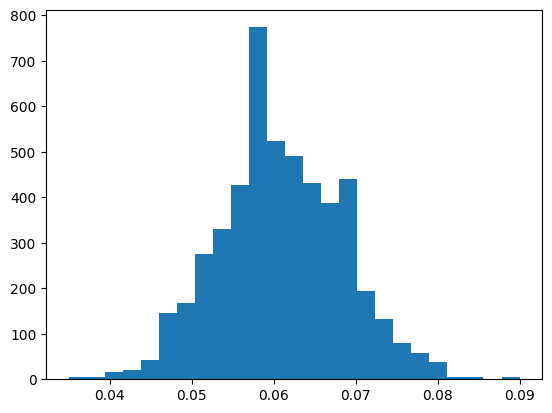

In [9]:
late_shipments['is_late'] = late_shipments['late'].apply(
    lambda x: 1 if x == 'Yes' else 0
)

late_shipments_boot_distn = []
for i in range(5000):
    late_shipments_boot_distn.append(
    # Step 2. Calculate point estimate
        np.mean(
            # Step 1. Resample
            late_shipments.sample(frac=1, replace=True)['is_late']
        )
)

import matplotlib.pyplot as plt
plt.hist(late_shipments_boot_distn, bins=25)
plt.show()

In [10]:
# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn, ddof=1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error


# Print z_score
print(z_score)

0.13230692527385363


#### **p-values**

1. Criminal trials

Two possible true states:
        1. Defendant committed the crime
        2. Defendant did not commit the crime
Two possible verdicts:
        1. Guilty
        2. Not guilty
    Initially the defendant is assumed to be not guilty
    
2. Age of first programming experience

age_first_code_cut classifies when Stack Overflow user first started programming
    "adult" means they started at 14 or older
    "child" means they started before 14
Previous research: 35% of software developers started programming as children
Evidence that a greater proportion of data scientists starting programming as children?

3. Definitions

A hypothesis is a statement about an unknown population parameter
A hypothesis test is a test of two competing hypotheses
The null hypothesis (H0 ) is the existing idea
The alternative hypothesis (Ha ) is the new "challenger" idea of the researcher
For our problem:
H0 : The proportion of data scientists starting programming as children is 35%
Ha : The proportion of data scientists starting programming as children is greater than 35%

4. Criminal trials vs. hypothesis testing

Either Ha or H0 is true (not both)
Initially, H0 is assumed to be true
The test ends in either "reject H0 " or "fail to reject H0 "
If the evidence from the sample is "significant" that Ha is true, reject H0 , else choose H0
Significance level is "beyond a reasonable doubt" for hypothesis testing

5. One-tailed and two-tailed tests

Hypothesis tests check if the sample statistics
lie in the tails of the null distribution

Test                                            Tails
alternative different from null             two-tailed
alternative greater than null               right-tailed
alternative less than null                  left-tailed

Ha : The proportion of data scientists starting
programming as children is greater than 35%
This is a right-tailed test

p-values: probability of obtaining a result,
assuming the null hypothesis is true

Large p-value, large support for H0
Statistic likely not in the tail of the null
distribution

Small p-value, strong evidence against H0
Statistic likely in the tail of the null
distribution

"p" in p-value → probability
"small" means "close to zero"

6. Calculating the z-score

prop_child_samp = (stack_overflow['age_first_code_cut'] == "child").mean()

prop_child_hyp = 0.35

std_error = np.std(first_code_boot_distn, ddof=1)

z_score = (prop_child_samp - prop_child_hyp) / std_error

7. Calculating the p-value

norm.cdf() is normal CDF from scipy.stats .
Left-tailed test → use norm.cdf() .
Right-tailed test → use 1 - norm.cdf() .

from scipy.stats import norm
1 - norm.cdf(z_score, loc=0, scale=1)

In [11]:
stack_overflow['is_child'] = stack_overflow['age_first_code_cut'].apply(
    lambda x: 1 if x == 'child' else 0
)

first_code_boot_distn = []
for i in range(5000):
    first_code_boot_distn.append(
    # Step 2. Calculate point estimate
        np.mean(
            # Step 1. Resample
            stack_overflow.sample(frac=1, replace=True)['is_child']
        )
)

prop_child_samp = (stack_overflow['age_first_code_cut'] == "child").mean()

prop_child_hyp = 0.35

std_error = np.std(first_code_boot_distn, ddof=1)

z_score = (prop_child_samp - prop_child_hyp) / std_error

print(prop_child_hyp)
print(std_error)
print(z_score)

from scipy.stats import norm
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)
print(p_value)

0.35
0.010060222490530131
4.11717790774906
1.917700003284395e-05


Calculating p-values
In order to determine whether to choose the null hypothesis or the alternative hypothesis, you need to calculate a p-value from the z-score.

You'll now return to the late shipments dataset and the proportion of late shipments.

The null hypothesis, 
, is that the proportion of late shipments is six percent.

The alternative hypothesis, 
, is that the proportion of late shipments is greater than six percent.

The observed sample statistic, late_prop_samp, the hypothesized value, late_prop_hyp (6%), and the bootstrap standard error, std_error are available. norm from scipy.stats has also been loaded without an alias.

In [12]:
# Calculate the z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

# Calculate the p-value
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)
                 
# Print the p-value
print(p_value) 


0.46040979350255684


#### **Statistical significance**

1. p-value recap
p-values quantify evidence for the null hypothesis
Large p-value → fail to reject null hypothesis
Small p-value → reject null hypothesis
Where is the cutoff point?

2. Significance level
The significance level of a hypothesis test (α) is the threshold point for "beyond a
reasonable doubt"
Common values of α are 0.2 , 0.1 , 0.05 , and 0.01
If p ≤ α, reject H , else fail to reject H
α should be set prior to conducting the hypothesis test

3. Calculating the p-value
alpha = 0.05
prop_child_samp = (stack_overflow['age_first_code_cut'] == "child").mean()
prop_child_hyp = 0.35
std_error = np.std(first_code_boot_distn, ddof=1)
z_score = (prop_child_samp - prop_child_hyp) / std_error
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)

4. Making a decision

alpha = 0.05
print(p_value)
3.1471479512323874e-05
p_value <= alpha
True
Reject H0 in favor of HA

5. Confidence intervals

For a significance level of α, it's common to choose a confidence interval level of 1 - α
α = 0.05 → 95% confidence interval
import numpy as np
lower = np.quantile(first_code_boot_distn, 0.025)
upper = np.quantile(first_code_boot_distn, 0.975)
print((lower, upper))
(0.37063246351172047, 0.41132242370632466)

6. Types of errors

                        Truly didn't commit crime       Truly committed crime
Verdict not guilty      correct                         they got away with it
Verdict guilty          wrongful conviction             correct


                        actual H0                        actual Ha
chosen H0               correct                         false negative
chosen Ha               false                           positive correct

False positives are Type I errors; false negatives are Type II errors.

7. Possible errors in our example

If p ≤ α, we reject H :
    A false positive (Type I) error: data scientists didn't start coding as children at a higher rate
If p > α, we fail to reject H :
    A false negative (Type II) error: data scientists started coding as children at a higher rate


    If the null hypothesis is true and you rejected it, you've committed a type I error.

In [13]:
alpha = 0.05
prop_child_samp = (stack_overflow['age_first_code_cut'] == "child").mean()
prop_child_hyp = 0.35
std_error = np.std(first_code_boot_distn, ddof=1)
z_score = (prop_child_samp - prop_child_hyp) / std_error
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)

print(p_value) 

print(p_value <= alpha)
## Reject H0 in favor of HA

1.917700003284395e-05
True


In [14]:
import numpy as np
lower = np.quantile(first_code_boot_distn, 0.025)
upper = np.quantile(first_code_boot_distn, 0.975)
print((lower, upper))

(0.37195931003980537, 0.4117647058823529)


Calculating a confidence interval
If you give a single estimate of a sample statistic, you are bound to be wrong by some amount. For example, the hypothesized proportion of late shipments was 6%. Even if evidence suggests the null hypothesis that the proportion of late shipments is equal to this, for any new sample of shipments, the proportion is likely to be a little different due to sampling variability. Consequently, it's a good idea to state a confidence interval. That is, you say, "we are 95% 'confident' that the proportion of late shipments is between A and B" (for some value of A and B).

Sampling in Python demonstrated two methods for calculating confidence intervals. Here, you'll use quantiles of the bootstrap distribution to calculate the confidence interval.

late_prop_samp and late_shipments_boot_distn are available; pandas and numpy are loaded with their usual aliases.

In [15]:
# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_distn, 0.025)
upper = np.quantile(late_shipments_boot_distn, 0.975)

# Print the confidence interval
print((lower, upper))

(0.047, 0.076)


### complementary

https://www.youtube.com/watch?v=bJm2pt-mq2c

https://www.youtube.com/watch?v=1g3pCE_B12E&t=4s

https://www.youtube.com/watch?v=6XPPmv9HXJw

https://www.youtube.com/watch?v=DlwOTOydeyk

## **Two-Sample and ANOVA Tests (Module 02-054)**

#### **Performing t-tests**

https://www.youtube.com/watch?v=VekJxtk4BYM

1. Two-sample problems
Compare sample statistics across groups of a variable
converted_comp is a numerical variable
age_first_code_cut is a categorical variable with levels ( "child" and "adult" )
Are users who first programmed as a child compensated higher than those that started as
adults?

2. Hypotheses

H0 : The mean compensation (in USD) is the same for those that coded first as a child and those that coded first as an adult.
Ho : μchild = μadult
H : μchild − μadult = 0

Ha : The mean compensation (in USD) is greater for those that coded first as a child compared to those that coded first as an adult.
Ha : μchild > μadult
Ha : μchild − μadult > 0

3. Calculating groupwise summary statistics

stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()
age_first_code_cut
adult 111313.311047
child 132419.570621
Name: converted_comp, dtype: float64

4. Test statistics

Sample mean estimates the population mean
xbar - a sample mean
xbar_child - sample mean compensation for coding first as a child
xbar_adult - sample mean compensation for coding first as an adult
xbar_child − xbar_adult - a test statistic
z-score - a (standardized) test statistic

5. Standardizing the test statistic
z = sample stat − population parameter / standard error
t = difference in sample stats − difference in population parameters / standard error
t = (xbar_child − xbar_adult) - (μchild − μadult) /SE(x¯child − x¯adult)

SE(x¯child − x¯adult) ≈ √(schild^2/nchild) + (sadult^2/nadult)

s is the standard deviation of the variable
n is the sample size (number of observations/rows in sample)

if H0 : μchild − μadult = 0 -- asumiendo la hipotesis nula verdadera

t = (xbar_child − xbar_adult) - 0 /SE(x¯child − x¯adult)

t = (xbar_child − xbar_adult) / √(schild^2/nchild) + (sadult^2/nadult)

6. Calculations assuming the null hypothesis is true

xbar = stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()
adult 111313.311047
child 132419.570621
Name: converted_comp, dtype: float64 age_first_code_cut
s = stack_overflow.groupby('age_first_code_cut')['converted_comp'].std()
adult 271546.521729
child 255585.240115
Name: converted_comp, dtype: float64 age_first_code_cut
n = stack_overflow.groupby('age_first_code_cut')['converted_comp'].count()
adult 1376
child 885
Name: converted_comp, dtype: int64

7. Calculating the test statistic

t = (xbar_child − xbar_adult) / √(schild^2/nchild) + (sadult^2/nadult)

import numpy as np
numerator = xbar_child - xbar_adult
denominator = np.sqrt(s_child ** 2 / n_child + s_adult ** 2 / n_adult)
t_stat = numerator / denominator

1.8699313316221844

In [16]:
xbar = stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()
print(xbar)

s = stack_overflow.groupby('age_first_code_cut')['converted_comp'].std()
print(s)

n = stack_overflow.groupby('age_first_code_cut')['converted_comp'].count()
print(n)

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64
age_first_code_cut
adult    271546.521729
child    255585.240115
Name: converted_comp, dtype: float64
age_first_code_cut
adult    1376
child     885
Name: converted_comp, dtype: int64


In [17]:
xbar_adult = xbar.iloc[0]
xbar_child = xbar.iloc[1]

s_adult = s.iloc[0]
s_child = s.iloc[1]

n_adult = n.iloc[0]
n_child = n.iloc[1]

import numpy as np
numerator = xbar_child - xbar_adult
denominator = np.sqrt(s_child ** 2 / n_child + s_adult ** 2 / n_adult)
t_stat = numerator / denominator

print(t_stat)

1.8699313316221844


Two sample mean test statistic
The hypothesis test for determining if there is a difference between the means of two populations uses a different type of test statistic to the z-scores you saw in Chapter 1. It's called "t", and it can be calculated from three values from each sample using this equation.

 
 t = (xbar_child − xbar_adult) / √(schild^2/nchild) + (sadult^2/nadult)
 

While trying to determine why some shipments are late, you may wonder if the weight of the shipments that were on time is less than the weight of the shipments that were late. The late_shipments dataset has been split into a "yes" group, where late == "Yes" and a "no" group where late == "No". The weight of the shipment is given in the weight_kilograms variable.

The sample means for the two groups are available as xbar_no and xbar_yes. The sample standard deviations are s_no and s_yes. The sample sizes are n_no and n_yes. numpy is also loaded as np.

In [18]:
xbar_shipment = late_shipments.groupby('late')['weight_kilograms'].mean()
print(xbar_shipment)

s_shipment = late_shipments.groupby('late')['weight_kilograms'].std()
print(s_shipment)

n_shipment = late_shipments.groupby('late')['weight_kilograms'].count()
print(n_shipment)

late
No     1897.791267
Yes    2715.672131
Name: weight_kilograms, dtype: float64
late
No     3154.039507
Yes    2544.688211
Name: weight_kilograms, dtype: float64
late
No     939
Yes     61
Name: weight_kilograms, dtype: int64


In [19]:
xbar_no = xbar_shipment.iloc[0]
xbar_yes = xbar_shipment.iloc[1]

s_no = s_shipment.iloc[0]
s_yes = s_shipment.iloc[1]

n_no = n_shipment.iloc[0]
n_yes = n_shipment.iloc[1]

In [20]:
# Calculate the numerator of the test statistic
numerator = xbar_no - xbar_yes

# Calculate the denominator of the test statistic
denominator = np.sqrt(s_no ** 2 / n_no + s_yes ** 2 / n_yes)

# Calculate the test statistic
t_stat = numerator / denominator

# Print the test statistic
print(t_stat)

-2.3936661778766433


#### **Calculating p-values from t-statistics**

1. t-distributions
t statistic follows a t-distribution
Have a parameter named degrees of freedom, or df
Look like normal distributions, with fatter tails
2. Degrees of freedom
Larger degrees of freedom → t-distribution
gets closer to the normal distribution
Normal distribution → t-distribution with
infinite df
Degrees of freedom: maximum number of
logically independent values in the data
sample
3. Calculating degrees of freedom
Dataset has 5 independent observations
Four of the values are 2, 6, 8, and 5
The sample mean is 5
The last value must be 4
Here, there are 4 degrees of freedom
df = nchild + nadult − 2
4. Hypotheses
H0: The mean compensation (in USD) is the same for those that coded first as a child and
those that coded first as an adult
Ha : The mean compensation (in USD) is greater for those that coded first as a child
compared to those that coded first as an adult
Use a right-tailed test
5. Significance level
α = 0.1
If p ≤ α then reject H0.
6. Calculating p-values: one proportion vs. a value
from scipy.stats import norm
1 - norm.cdf(z_score)

SE(x¯child − x¯adult) ≈ √(schild^2/nchild) + (sadult^2/nadult)
z-statistic: needed when using one sample statistic to estimate a population parameter
t-statistic: needed when using multiple sample statistics to estimate a population parameter

7. Calculating p-values: two means from different groups
numerator = xbar_child - xbar_adult
denominator = np.sqrt(s_child ** 2 / n_child + s_adult ** 2 / n_adult)
t_stat = numerator / denominator

degrees_of_freedom = n_child + n_adult - 2

Use t-distribution CDF not normal CDF
from scipy.stats import t
1 - t.cdf(t_stat, df=degrees_of_freedom)

Evidence that Stack Overflow data scientists who started coding as a child earn more.

In [21]:
from scipy.stats import norm
1 - norm.cdf(z_score)

1.917700003284395e-05

In [22]:
numerator = xbar_child - xbar_adult
denominator = np.sqrt(s_child ** 2 / n_child + s_adult ** 2 / n_adult)
t_stat = numerator / denominator
print(t_stat)

degrees_of_freedom = n_child + n_adult - 2
print(degrees_of_freedom)

1.8699313316221844
2259


In [23]:
from scipy.stats import t
1 - t.cdf(t_stat, df=degrees_of_freedom)

0.030811302165157595

From t to p
Previously, you calculated the test statistic for the two-sample problem of whether the mean weight of shipments is smaller for shipments that weren't late (late == "No") compared to shipments that were late (late == "Yes"). In order to make decisions about it, you need to transform the test statistic with a cumulative distribution function to get a p-value.

Recall the hypotheses:

: The mean weight of shipments that weren't late is the same as the mean weight of shipments that were late.

: The mean weight of shipments that weren't late is less than the mean weight of shipments that were late.

The test statistic, t_stat, is available, as are the samples sizes for each group, n_no and n_yes. Use a significance level of alpha = 0.05.

t has also been imported from scipy.stats.

In [24]:
alpha = 0.05

## Reject the null hypothesis. alpha = 0.05

# Calculate the degrees of freedom
degrees_of_freedom = n_no + n_yes - 2

# Calculate the p-value from the test stat
p_value = t.cdf(t_stat, df=degrees_of_freedom)

# Print the p_value
print(p_value)

## Reject the null hypothesis. 0.008 < alpha = true

print(p_value<alpha)

0.9691070256380481
False


#### **Paired t-tests**

1. US Republican presidents dataset
100 rows; each row represents county-level votes in a presidential election.

2. Hypotheses
Question: Was the percentage of Republican candidate votes lower in 2008 than 2012?
H : μ2008 − μ2012 = 0
H : μ2008 − μ2012 < 0
Set α = 0.05 significance level.
Data is paired → each voter percentage refers to the same county
Want to capture voting patterns in model

3. From two samples to one
sample_data = repub_votes_potus_08_12
sample_data['diff'] = sample_data['repub_percent_08'] - sample_data['repub_percent_12']
import matplotlib.pyplot as plt
sample_data['diff'].hist(bins=20)

4. Calculate sample statistics of the difference
xbar_diff = sample_data['diff'].mean()

5. Revised hypotheses

Old hypotheses:
Ho : μ2008 − μ2012 = 0
Ha : μ2008 − μ2012 < 0
New hypotheses:
Ho : μdiff = 0
Ha : μdiff < 0

t = (xbar_diff - μdiff) / √(sdiff^2/ndiff)
df = ndiff − 1

6. Calculating the p-value

n_diff = len(sample_data)

xbar_diff = sample_data['diff'].mean()
print(xbar_diff)

n_diff = len(sample_data)
print(n_diff)

t = (xbar_diff - μdiff) / √(sdiff^2/ndiff)

s_diff = sample_data['diff'].std()
t_stat = (xbar_diff-0) / np.sqrt(s_diff**2/n_diff)
print(t_stat)

degrees_of_freedom = n_diff - 1
print(degrees_of_freedom)

from scipy.stats import t
p_value = t.cdf(t_stat, df=n_diff-1)
print(p_value)

7. Testing differences between two means using ttest()

Testing differences between two means using ttest()
import pingouin
pingouin.ttest(x=sample_data['diff'],
y=0,
alternative="less")
T dof alternative p-val CI95% cohen-d \
T-test -5.601043 99 less 9.572537e-08 [-inf, -2.02] 0.560104
BF10 power
T-test 1.323e+05 1.0
Details on Returns from pingouin.ttest() are available in the API docs for pingouin at https://pingouinstats.
org/generated/pingouin.ttest.html#pingouin.ttest.

8. ttest() with paired=True

pingouin.ttest(x=sample_data['repub_percent_08'],
y=sample_data['repub_percent_12'],
paired=True,
alternative="less")
T dof alternative p-val CI95% cohen-d \
T-test -5.601043 99 less 9.572537e-08 [-inf, -2.02] 0.217364
BF10 power
T-test 1.323e+05 0.696338

9. Unpaired ttest()

pingouin.ttest(x=sample_data['repub_percent_08'],
y=sample_data['repub_percent_12'],
paired=False, # The default
alternative="less")

Unpaired t-tests on paired data increases the chances of false negative errors

<AxesSubplot: >

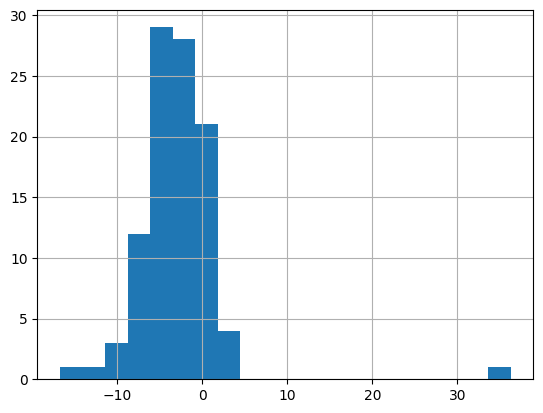

In [40]:
sample_data = repub_votes_potus_08_12
sample_data['diff'] = sample_data['repub_percent_08'] - sample_data['repub_percent_12']
import matplotlib.pyplot as plt
sample_data['diff'].hist(bins=20)

In [41]:
xbar_diff = sample_data['diff'].mean()
print(xbar_diff)

n_diff = len(sample_data)
print(n_diff)

## t = (xbar_diff - μdiff) / √(sdiff^2/ndiff)
s_diff = sample_data['diff'].std()
t_stat = (xbar_diff-0) / np.sqrt(s_diff**2/n_diff)
print(t_stat)

degrees_of_freedom = n_diff - 1
print(degrees_of_freedom)

from scipy.stats import t
p_value = t.cdf(t_stat, df=n_diff-1)
print(p_value)

-2.877109041242944
100
-5.601043121928489
99
9.572537285272411e-08


In [33]:
# import sys
# print(sys.executable)

In [32]:
### !python -m pip install pingouin

In [42]:
import pingouin
pingouin.ttest(x=sample_data['diff'],
                y=0,
                alternative="less")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.560104,1.323e+05,1.0


In [35]:
pingouin.ttest(x=sample_data['repub_percent_08'],
                y=sample_data['repub_percent_12'],
                paired=True,
                alternative="less")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.217364,1.323e+05,0.696338


In [36]:
pingouin.ttest(x=sample_data['repub_percent_08'],
                y=sample_data['repub_percent_12'],
                paired=False, # The default
                alternative="less")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.536997,198,less,0.062945,"[-inf, 0.22]",0.217364,0.927,0.454972


Visualizing the difference
Before you start running hypothesis tests, it's a great idea to perform some exploratory data analysis; that is, calculating summary statistics and visualizing distributions.

Here, you'll look at the proportion of county-level votes for the Democratic candidate in 2012 and 2016, sample_dem_data. Since the counties are the same in both years, these samples are paired. The columns containing the samples are dem_percent_12 and dem_percent_16.

dem_votes_potus_12_16 is available as sample_dem_data. pandas and matplotlib.pyplot are loaded with their usual aliases.

In [48]:
sample_dem_data = dem_votes_potus_12_16

# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Print sample_dem_data
print(sample_dem_data)

       state       county  dem_percent_12  dem_percent_16       diff
0    Alabama      Bullock       76.305900       74.946921   1.358979
1    Alabama      Chilton       19.453671       15.847352   3.606319
2    Alabama         Clay       26.673672       18.674517   7.999155
3    Alabama      Cullman       14.661752       10.028252   4.633500
4    Alabama     Escambia       36.915731       31.020546   5.895185
..       ...          ...             ...             ...        ...
495  Wyoming        Uinta       19.065464       14.191263   4.874201
496  Wyoming     Washakie       20.131846       13.948610   6.183235
497   Alaska   District 3       33.514582       16.301064  17.213518
498   Alaska  District 18       61.284271       52.810051   8.474220
499   Alaska  District 24       42.913980       39.405286   3.508694

[500 rows x 5 columns]


6.829312660106834
5.040139140132317


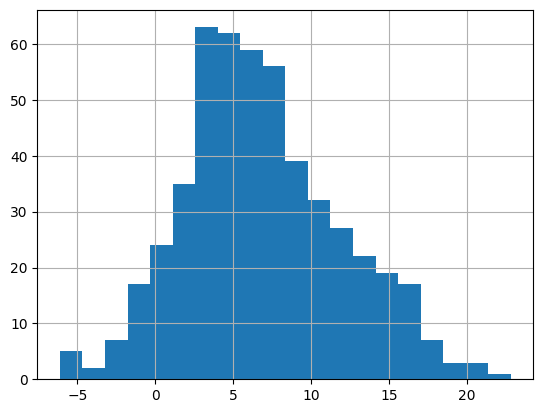

In [51]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Print xbar_diff
print(xbar_diff)

# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Print s_diff
print(s_diff)

# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist(bins=20)
plt.show()

Using ttest()
Manually calculating test statistics and transforming them with a CDF to get a p-value is a lot of effort to compare two sample means. The comparison of two sample means is called a t-test, and the pingouin Python package has a .ttest() method to accomplish it. This method provides some flexibility in how you perform the test.

As in the previous exercise, you'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant. The hypotheses are as follows:

Ho: The proportion of democratic votes in 2012 and 2016 were the same. 
Ha: The proportion of democratic votes in 2012 and 2016 were different.

sample_dem_data is available and has the columns diff, dem_percent_12, and dem_percent_16 in addition to the state and county names. pingouin and has been loaded along with pandas as pd.

In [52]:
# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'],
                y=0,
                alternative="two-sided")


                              
# Print the test results
print(test_results)

# Reject the null hypothesis.

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  1.354985   

              BF10  power  
T-test  2.246e+111    1.0  


In [56]:

# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'],
                                    y=sample_dem_data['dem_percent_16'],
                                    paired=True,
                                    alternative="two-sided")
                              
# Print the paired test results
print(paired_test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  0.454202   

              BF10  power  
T-test  2.246e+111    1.0  


In [57]:
#unpaired
pingouin.ttest(x=sample_dem_data['dem_percent_12'], 
               y=sample_dem_data['dem_percent_16'], 
               alternative="two-sided")

#Paired t-test party! Using .ttest() lets you avoid manual calculation to run your test. 
# When you have paired data, a paired t-test is preferable to the unpaired version 
# because it reduces the chance of a false negative error.

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,7.181565,998,two-sided,1.345737e-12,"[4.96, 8.7]",0.454202,4.308e+09,1.0


#### **ANOVA tests**

1. Job satisfaction: 5 categories
stack_overflow['job_sat'].value_counts()

2. Visualizing multiple distributions
Is mean annual compensation different for
different levels of job satisfaction?
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="converted_comp",
            y="job_sat",
            data=stack_overflow)
plt.show()

3. Analysis of variance (ANOVA)

A test for differences between groups
alpha = 0.2
pingouin.anova(data=stack_overflow,
dv="converted_comp",
between="job_sat")
Source ddof1 ddof2 F p-unc np2
0 job_sat 4 2256 4.480485 0.001315 0.007882
0.001315 < α
At least two categories have significantly different compensation

4. Pairwise tests

μ very dissatisfied ≠ μ slightly dissatisfied
μ very dissatisfied ≠ μ neither
μ very dissatisfied ≠ μ slightly satisfied
μ very dissatisfied ≠ μ very satisfied
μ slightly dissatisfied ≠ μ neither
μ slightly dissatisfied ≠ μ slightly satisfied
μ slightly dissatisfied ≠ μ very satisfied
μ neither ≠ μ slightly satisfied
μ neither ≠ μ very satisfied
μ slightly satisfied ≠ μ very satisfied

Set significance level to α = 0.2

5. pairwise_tests()

pingouin.pairwise_tests(data=stack_overflow,
                        dv="converted_comp",
                        between="job_sat",
                        padjust="none")
 
6. As the number of groups increases...

there is more prob of a false positive

7. Bonferroni correction

pingouin.pairwise_tests(data=stack_overflow,
                        dv="converted_comp",
                        between="job_sat",
                        padjust="bonf")
 
8. More methods

padjust : string
Method used for testing and adjustment of pvalues.
'none' : no correction [default]
'bonf' : one-step Bonferroni correction
'sidak' : one-step Sidak correction
'holm' : step-down method using Bonferroni adjustments
'fdr_bh' : Benjamini/Hochberg FDR correction
'fdr_by' : Benjamini/Yekutieli FDR correction

job_sat
Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: count, dtype: int64

C:\Users\mcaba\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


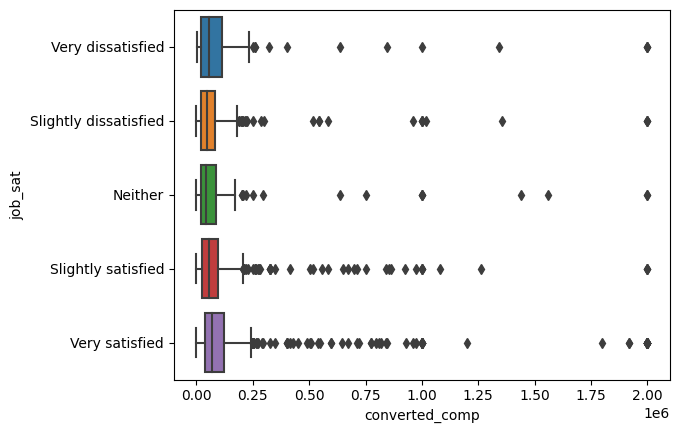

In [59]:
display(
stack_overflow['job_sat'].value_counts()
)

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="converted_comp",
            y="job_sat",
            data=stack_overflow)
plt.show()

In [60]:
alpha = 0.2
pingouin.anova(data=stack_overflow,
                dv="converted_comp",
                between="job_sat")

,Source,ddof1,ddof2,F,p-unc,np2
0,job_sat,4,2256,4.480485,0.001315,0.007882


In [61]:
pingouin.pairwise_tests(data=stack_overflow,
                        dv="converted_comp",
                        between="job_sat",
                        padjust="none")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,0.197,0.119131
1,job_sat,Very dissatisfied,Neither,False,True,0.545948,321.165726,two-sided,0.585481,0.135,0.058537
2,job_sat,Very dissatisfied,Slightly satisfied,False,True,1.243665,187.153329,two-sided,0.215179,0.208,0.145624
3,job_sat,Very dissatisfied,Very satisfied,False,True,-0.747379,221.666205,two-sided,0.455627,0.126,-0.063479
4,job_sat,Slightly dissatisfied,Neither,False,True,-0.602209,367.730081,two-sided,0.547406,0.118,-0.055707
5,job_sat,Slightly dissatisfied,Slightly satisfied,False,True,0.038264,569.926329,two-sided,0.969491,0.074,0.002719
6,job_sat,Slightly dissatisfied,Very satisfied,False,True,-3.076222,821.303063,two-sided,0.002166,7.43,-0.173247
7,job_sat,Neither,Slightly satisfied,False,True,0.700752,258.204546,two-sided,0.484088,0.114,0.068513
8,job_sat,Neither,Very satisfied,False,True,-1.662901,328.326639,two-sided,0.097286,0.337,-0.120115
9,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,158.564,-0.192931


In [62]:
pingouin.pairwise_tests(data=stack_overflow,
                        dv="converted_comp",
                        between="job_sat",
                        padjust="bonf")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,1.000000,bonf,0.197,0.119131
1,job_sat,Very dissatisfied,Neither,False,True,0.545948,321.165726,two-sided,0.585481,1.000000,bonf,0.135,0.058537
2,job_sat,Very dissatisfied,Slightly satisfied,False,True,1.243665,187.153329,two-sided,0.215179,1.000000,bonf,0.208,0.145624
3,job_sat,Very dissatisfied,Very satisfied,False,True,-0.747379,221.666205,two-sided,0.455627,1.000000,bonf,0.126,-0.063479
4,job_sat,Slightly dissatisfied,Neither,False,True,-0.602209,367.730081,two-sided,0.547406,1.000000,bonf,0.118,-0.055707
5,job_sat,Slightly dissatisfied,Slightly satisfied,False,True,0.038264,569.926329,two-sided,0.969491,1.000000,bonf,0.074,0.002719
6,job_sat,Slightly dissatisfied,Very satisfied,False,True,-3.076222,821.303063,two-sided,0.002166,0.021659,bonf,7.43,-0.173247
7,job_sat,Neither,Slightly satisfied,False,True,0.700752,258.204546,two-sided,0.484088,1.000000,bonf,0.114,0.068513
8,job_sat,Neither,Very satisfied,False,True,-1.662901,328.326639,two-sided,0.097286,0.972864,bonf,0.337,-0.120115
9,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,0.000638,bonf,158.564,-0.192931


Visualizing many categories
So far in this chapter, we've only considered the case of differences in a numeric variable between two categories. Of course, many datasets contain more categories. Before you get to conducting tests on many categories, it's often helpful to perform exploratory data analysis (EDA), calculating summary statistics for each group and visualizing the distributions of the numeric variable for each category using box plots.

Here, we'll return to the late shipments data, and how the price of each package (pack_price) varies between the three shipment modes (shipment_mode): "Air", "Air Charter", and "Ocean".

late_shipments is available; pandas and matplotlib.pyplot are loaded with their standard aliases, and seaborn is loaded as sns.

shipment_mode
Air            39.712395
Air Charter     4.226667
Ocean           6.432273
Name: pack_price, dtype: float64
shipment_mode
Air            48.932861
Air Charter     0.992969
Ocean           5.303047
Name: pack_price, dtype: float64


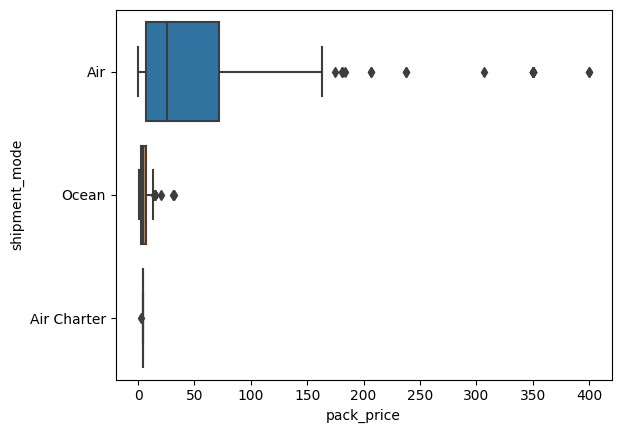

In [66]:
xbar_pack_by_mode = late_shipments.groupby('shipment_mode')['pack_price'].mean()

# Print the grouped means
print(xbar_pack_by_mode)

# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()

# Print the grouped standard deviations
print(s_pack_by_mode)

# Boxplot of shipment_mode vs. pack_price
sns.boxplot(x="pack_price",
            y="shipment_mode",
            data=late_shipments)
plt.show()

Conducting an ANOVA test
The box plots made it look like the distribution of pack price was different for each of the three shipment modes. However, it didn't tell us whether the mean pack price was different in each category. To determine that, we can use an ANOVA test. The null and alternative hypotheses can be written as follows.

H0 : Pack prices for every category of shipment mode are the same.

Ha: Pack prices for some categories of shipment mode are different.

Use a significance level of 0.1.

late_shipments is available and pingouin has been loaded.

In [ ]:
# Run an ANOVA for pack_price across shipment_mode
anova_results = pingouin.anova(data=late_shipments,
                dv="pack_price",
                between="shipment_mode")



# Print anova_results
print(anova_results)

# Yes. The p-value is less than or equal to the significance level, 
# so the null hypothesis should be rejected.

          Source  ddof1  ddof2        F         p-unc       np2
0  shipment_mode      2    997  21.8646  5.089479e-10  0.042018


Pairwise t-tests
The ANOVA test didn't tell you which categories of shipment mode had significant differences in pack prices. To pinpoint which categories had differences, you could instead use pairwise t-tests.

late_shipments is available and pingouin has been loaded.

In [68]:
# Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pingouin.pairwise_tests(data=late_shipments,
                        dv="pack_price",
                        between="shipment_mode",
                        padjust="none") 




# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc       BF10    hedges  
0  600.685682   two-sided  8.748346e-75  5.809e+76  0.726592  
1  986.979785   two-sided  6.934555e-71  1.129e+67  0.711119  
2   35.615026   two-sided  3.123012e-03     15.277 -0.423775  


In [69]:
# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pingouin.pairwise_tests(data=late_shipments, 
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="bonf")

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc        p-corr p-adjust       BF10  \
0  600.685682   two-sided  8.748346e-75  2.624504e-74     bonf  5.809e+76   
1  986.979785   two-sided  6.934555e-71  2.080367e-70     bonf  1.129e+67   
2   35.615026   two-sided  3.123012e-03  9.369037e-03     bonf     15.277   

     hedges  
0  0.726592  
1  0.711119  
2 -0.423775  


## **Proportion Tests (Module 03-054)**

#### **xxxx**

1. xxx

2. xxx

3. xxx

4. xxx

In [ ]:
display(

)

display(

)

display(

)

#### **xxxx**

1. xxx

2. xxx

3. xxx

4. xxx

In [ ]:
display(

)

display(

)

display(

)

#### **xxxx**

1. xxx

2. xxx

3. xxx

4. xxx

In [ ]:
display(

)

display(

)

display(

)

#### **xxxx**

1. xxx

2. xxx

3. xxx

4. xxx

In [ ]:
display(

)

display(

)

display(

)

## **Non-Parametric Tests (Module 04-054)**

#### **xxxx**

1. xxx

2. xxx

3. xxx

4. xxx

In [ ]:
display(

)

display(

)

display(

)

#### **xxxx**

1. xxx

2. xxx

3. xxx

4. xxx

In [ ]:
display(

)

display(

)

display(

)

#### **xxxx**

1. xxx

2. xxx

3. xxx

4. xxx

In [ ]:
display(

)

display(

)

display(

)

#### **xxxx**

1. xxx

2. xxx

3. xxx

4. xxx

In [ ]:
print('Perrenque!')

Perrenque!
